# Reconhecimento de texto manuscrito - testando o modelo

# Importando as bibliotecas

In [1]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
import imutils
from google.colab.patches import cv2_imshow

# Carregando a rede neural

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
rede_neural = load_model('/content/drive/MyDrive/OCR/Modelos/rede_neural')
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

# Carregando a imagem de teste

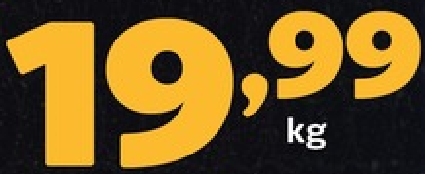

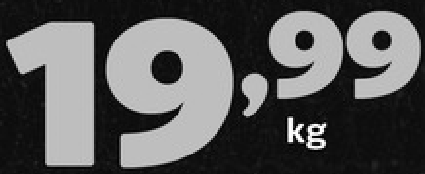

In [48]:
img = cv2.imread('/content/teste_novo.png')
cv2_imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [7]:
img.shape

(100, 200, 3)

# Pré-processamento da imagem

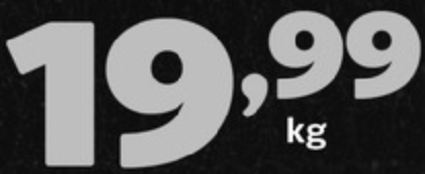

In [49]:
desfoque = cv2.GaussianBlur(gray, (3,3), 0)
cv2_imshow(desfoque)

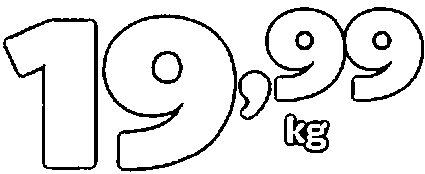

In [50]:
adapt_media = cv2.adaptiveThreshold(desfoque, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adapt_media)

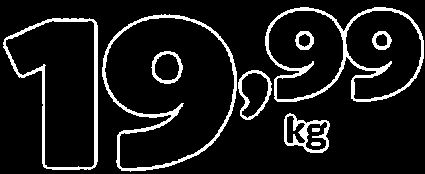

In [51]:
inv = 255 - adapt_media
cv2_imshow(inv)

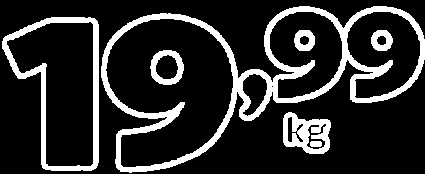

In [52]:
dilatado = cv2.dilate(inv, np.ones((3,3)))
cv2_imshow(dilatado)

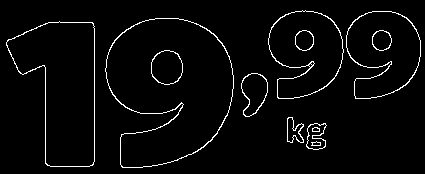

In [53]:
bordas = cv2.Canny(desfoque, 40, 150)
cv2_imshow(bordas)

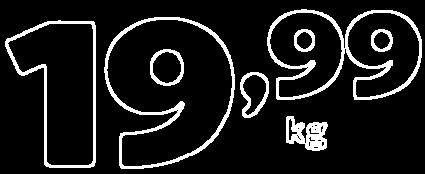

In [54]:
dilatado = cv2.dilate(bordas, np.ones((3,3)))
cv2_imshow(dilatado)

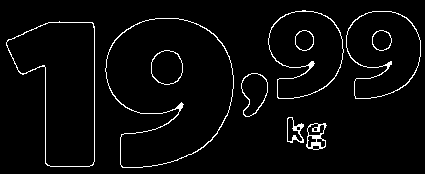

In [57]:
erosao = cv2.erode(dilatado, np.ones((3,3)))
cv2_imshow(erosao)

# Detecção de contornos

In [60]:
def encontrar_contornos(img):
  conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sort_contours(conts, method='left-to-right')[0]
  return conts

In [61]:
conts = encontrar_contornos(erosao.copy())

In [62]:
conts

(array([[[ 59,  21]],
 
        [[ 58,  22]],
 
        [[ 48,  22]],
 
        [[ 47,  23]],
 
        [[ 45,  23]],
 
        [[ 44,  24]],
 
        [[ 43,  24]],
 
        [[ 42,  25]],
 
        [[ 40,  25]],
 
        [[ 39,  26]],
 
        [[ 38,  26]],
 
        [[ 37,  27]],
 
        [[ 36,  27]],
 
        [[ 35,  28]],
 
        [[ 34,  28]],
 
        [[ 33,  29]],
 
        [[ 31,  29]],
 
        [[ 30,  30]],
 
        [[ 29,  30]],
 
        [[ 28,  31]],
 
        [[ 26,  31]],
 
        [[ 25,  32]],
 
        [[ 24,  32]],
 
        [[ 22,  34]],
 
        [[ 21,  34]],
 
        [[ 20,  35]],
 
        [[ 18,  35]],
 
        [[ 17,  36]],
 
        [[ 16,  36]],
 
        [[ 15,  37]],
 
        [[ 14,  37]],
 
        [[ 13,  38]],
 
        [[ 12,  38]],
 
        [[ 11,  39]],
 
        [[  8,  39]],
 
        [[  7,  40]],
 
        [[  7,  41]],
 
        [[  6,  42]],
 
        [[  6,  45]],
 
        [[  7,  46]],
 
        [[  7,  47]],
 
        [[  8,  

In [66]:
l_min, l_max = 4, 80
a_min, a_max = 80, 500

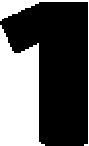

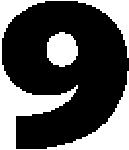

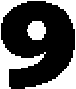

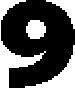

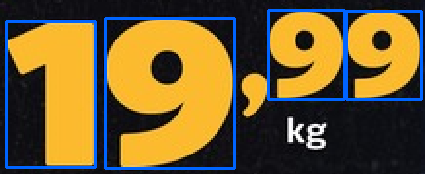

In [67]:
caracteres = []
img_cp = img.copy()

!#l_min, l_max = 4, 190
#a_min, a_max = 80, 100

for c in conts:
  #print(c)
  (x, y, w, h) = cv2.boundingRect(c)
  #print(x, y, w, h)
  if (h >= a_min and h <= a_max):# and (w >= l_min and w <= l_max): # and 
    roi = gray[y:y+ h, x:x + w]
    #cv2_imshow(roi)
    thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    cv2_imshow(thresh)
    cv2.rectangle(img_cp, (x, y), (x + w, y + h), (255, 100, 0), 2)
cv2_imshow(img_cp)

In [40]:
 h

124

# Processando os caracteres detectados

## Extração ROI


In [153]:
def extra_roi(img):
  roi = img[y:y + h, x:x + w]
  return roi

## Limiarização

In [154]:
def limiarizacao(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
  return thresh

## Redimensionamento

In [155]:
def redimensiona_img(img, l, a):
  if l > a:
    redimensionada = imutils.resize(img, width=28)
  else:
    redimensionada = imutils.resize(img, height=28)

  (a, l) = redimensionada.shape
  dX = int(max(0, 28 - l) / 2.0)
  dY = int(max(0, 28 - a) / 2.0)

  preenchida = cv2.copyMakeBorder(redimensionada, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
  preenchida = cv2.resize(preenchida, (28, 28))
  return preenchida

105 18 129 150


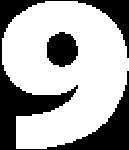

150 129


(28, 28)

In [156]:
(x, y, w, h) = cv2.boundingRect(conts[1])
print(x, y, w, h)
img_teste = limiarizacao(gray[y:y+h, x:x+w])
cv2_imshow(img_teste)
(a, l) = img_teste.shape
print(a, l)
img_teste2 = redimensiona_img(img_teste, l, a)
cv2_imshow(img_teste2)
img_teste2.shape

In [157]:
cv2_imshow(cv2.resize(img_teste, (28,28)))

## Normalização

In [158]:
def normalizacao(img):
  img = img.astype('float32') / 255.0
  img = np.expand_dims(img, axis=-1)
  return img

In [159]:
img_teste2.shape, normalizacao(img_teste2).shape

((28, 28), (28, 28, 1))

## Processamento das detecções

In [160]:
def processa_caixa(gray, x, y, w, h):
  roi = extra_roi(gray)
  limiar = limiarizacao(roi)
  (a, l) = limiar.shape
  redimensionada = redimensiona_img(limiar, l, a)
  cv2_imshow(redimensionada)
  normalizada = normalizacao(redimensionada)
  caracteres.append((normalizada, (x, y, w, h)))

In [161]:
for c in conts:
  #print(c)
  (x, y, w, h) = cv2.boundingRect(c)
  if (h >= a_min and h <= a_max): #(w >= l_min and w <= l_max) and
    processa_caixa(gray, x, y, w, h)

In [162]:
caracteres[0]

(array([[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.04313726],
         [0.2784314 ],
         [0.53333336],
         [0.6156863 ],
         [0.6156863 ],
         [0.6156863 ],
         [0.6156863 ],
         [0.6156863 ],
         [0.6156863 ],
         [0.6156863 ],
         [0.5882353 ],
         [0.4       ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],
 
        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10980392],
         [0.37254903],
         [0.73333335],
         [0.9529412 ],
         [1.        ],
         [1.        ],
        

In [163]:
caixas = [caixa[1] for caixa in caracteres]
caixas

[(6, 21, 89, 146), (105, 18, 129, 150), (268, 10, 76, 89), (346, 11, 75, 88)]

In [164]:
caracteres = np.array([c[0] for c in caracteres], dtype='float32')

In [165]:
caracteres

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

# Reconhecimento dos caracteres

In [166]:
numeros = "0123456789"
letras = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
lista_caracteres = numeros + letras
lista_caracteres = [l for l in lista_caracteres]

In [167]:
print(lista_caracteres)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [168]:
caracteres[0].shape

(28, 28, 1)

In [169]:
caracteres.shape

(4, 28, 28, 1)

In [170]:
previsoes = rede_neural.predict(caracteres)

1/1 [==============================] - 0s 23ms/step


In [171]:
previsoes

array([[6.13407792e-06, 4.48341915e-08, 1.37742854e-05, 4.71164753e-07,
        5.32567037e-06, 3.41150508e-06, 4.07166938e-16, 1.26302883e-04,
        3.46180293e-08, 5.96152495e-05, 4.97203495e-04, 5.32683916e-04,
        2.38092639e-03, 6.53286576e-02, 1.97941449e-06, 1.52740078e-08,
        6.68701306e-02, 6.07039174e-09, 1.01562293e-07, 9.41746123e-03,
        2.96619965e-05, 3.28908754e-07, 5.54922968e-04, 1.00414315e-02,
        7.05015799e-03, 1.56439543e-01, 8.40363908e-04, 1.21537771e-03,
        2.18796355e-04, 6.71855628e-01, 3.59051931e-03, 9.41443759e-08,
        2.91671017e-06, 3.77743277e-07, 4.06076084e-04, 2.50948523e-03],
       [5.07017103e-05, 1.29857325e-09, 5.91304670e-05, 1.16007902e-06,
        1.02207446e-06, 4.39067549e-07, 1.74465042e-09, 1.94267686e-05,
        3.87611828e-04, 9.78089929e-01, 3.99239343e-06, 5.73062107e-06,
        4.63744215e-07, 1.36454313e-04, 1.91172944e-08, 1.63651594e-18,
        1.95587363e-05, 1.31180067e-11, 1.92379877e-17, 1.05574

In [172]:
previsoes.shape

(4, 36)

In [173]:
caixas

[(6, 21, 89, 146), (105, 18, 129, 150), (268, 10, 76, 89), (346, 11, 75, 88)]

T  ->  67.1855628490448


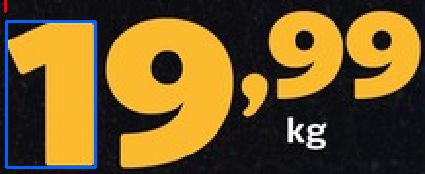

9  ->  97.80899286270142


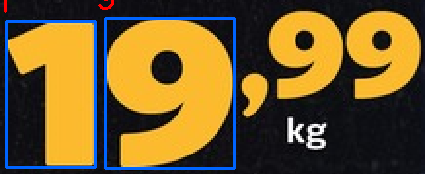

Q  ->  88.77280354499817


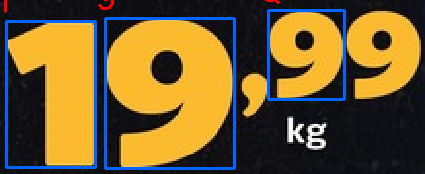

Q  ->  72.22585082054138


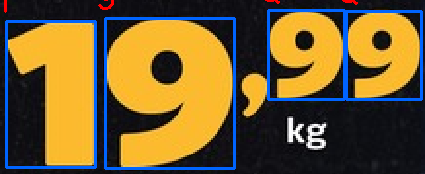

In [174]:
img_cp = img.copy()
for (previsoes, (x, y, w, h)) in zip(previsoes, caixas):
  i = np.argmax(previsoes)
  #print(i)
  probabilidade = previsoes[i]
  #print(probabilidade)
  caractere = lista_caracteres[i]
  #print(caractere)

  cv2.rectangle(img_cp, (x, y), (x + w, y + h), (255,100,0), 2)
  cv2.putText(img_cp, caractere, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255), 2)
  print(caractere, ' -> ', probabilidade * 100)

  cv2_imshow(img_cp)

In [175]:
def extrai_roi(img, margem=2):
  roi = img[y - margem:y + h + margem, x - margem:x + w + margem]
  return roi

In [179]:
conts = encontrar_contornos(erosao.copy())
caracteres = []
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  if (h >= a_min and h <= a_max): #(w >= l_min and w <= l_max) and 
    processa_caixa(gray, x, y, w, h)

In [180]:
caixas = [b[1] for b in caracteres]
caracteres = np.array([c[0] for c in caracteres], dtype="float32")
previsoes = rede_neural.predict(caracteres)

1/1 [==============================] - 0s 23ms/step


In [187]:
img_cp = img.copy()
for (previsoes, (x, y, w, h)) in zip(previsoes, caixas):
  i = np.argmax(previsoes)
  probabilidade = previsoes[i]
  caractere = lista_caracteres[i]

  cv2.rectangle(img_cp, (x, y), (x + w, y + h), (255,100,0), 2)
  cv2.putText(img_cp, caractere, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255), 2)
  print(caractere, ' -> ', probabilidade * 100)

  cv2_imshow(img_cp)

TypeError: ignored

# Outros testes

In [182]:
def preprocessar_img(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  desfoque = cv2.GaussianBlur(gray, (3, 3), 7)
  bordas = cv2.Canny(desfoque, 40, 150)
  dilatado = cv2.dilate(bordas, np.ones((3,3)))  
  return gray, dilatado

In [183]:
def predicao(previsoes, lista_caracteres):
  i = np.argmax(previsoes)
  probabilidade = previsoes[i]
  caractere = lista_caracteres[i]
  return i, probabilidade, caractere

In [184]:
def desenhar_na_img(img_cp, caractere):
  cv2.rectangle(img_cp, (x, y), (x + w, y + h), (255, 100, 0), 2)
  cv2.putText(img_cp, caractere, (x - 10, y - 10),cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255), 2)

## O problema do 0 e O, 1 e I, 5 e S

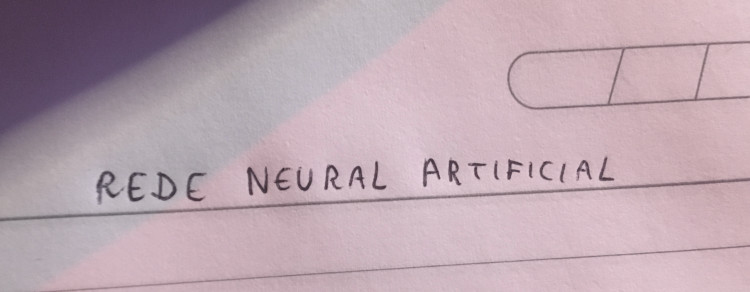

In [ ]:
img = cv2.imread('/content/teste_manuscrito02.jpg')
cv2_imshow(img)

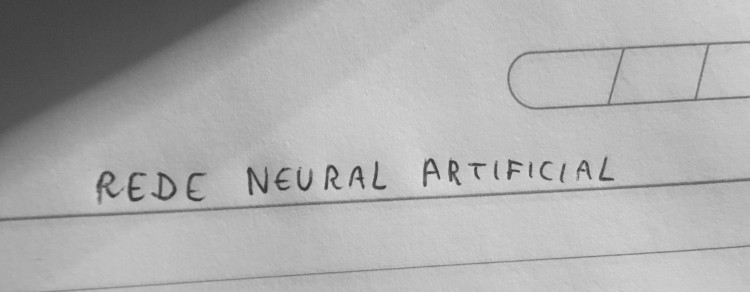

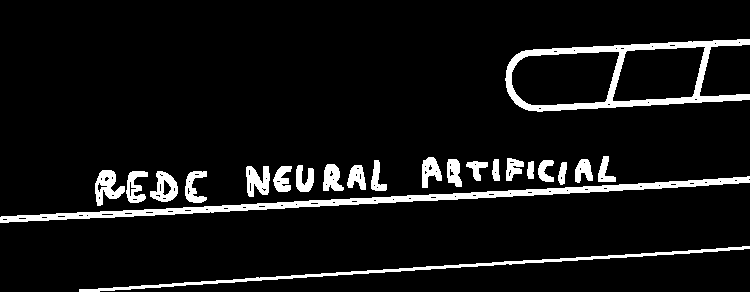

In [ ]:
gray, img_processada = preprocessar_img(img)
cv2_imshow(gray)
cv2_imshow(img_processada)

In [ ]:
conts = encontrar_contornos(img_processada.copy())
caracteres = []
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  if (w >= l_min and w <= l_max) and (h >= a_min and h <= a_max):
    processa_caixa(gray, x, y, w, h)

caixas = [b[1] for b in caracteres]
caracteres = np.array([c[0] for c in caracteres], dtype="float32")
previsoes = rede_neural.predict(caracteres)

In [ ]:
numeros_2 = "OI234S6789"
letras_2 = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
lista_caracteres_2 = numeros_2 + letras_2
lista_caracteres_2 = [l for l in lista_caracteres_2]

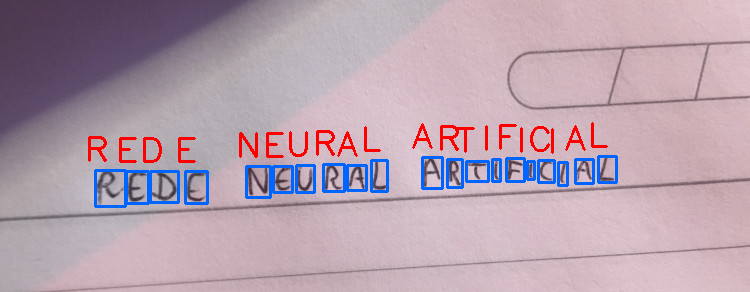

In [ ]:
img_cp = img.copy()
for (previsoes, (x, y, w, h)) in zip(previsoes, caixas):
  i, probabilidade, caractere = predicao(previsoes, lista_caracteres_2)
  desenhar_na_img(img_cp, caractere)
cv2_imshow(img_cp)

## O problema do texto não detectado

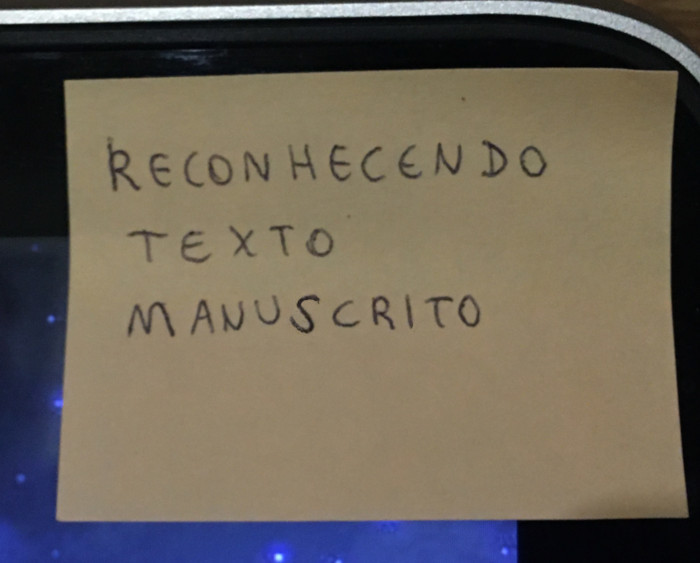

In [ ]:
img = cv2.imread('/content/teste_manuscrito03.jpg')
cv2_imshow(img)

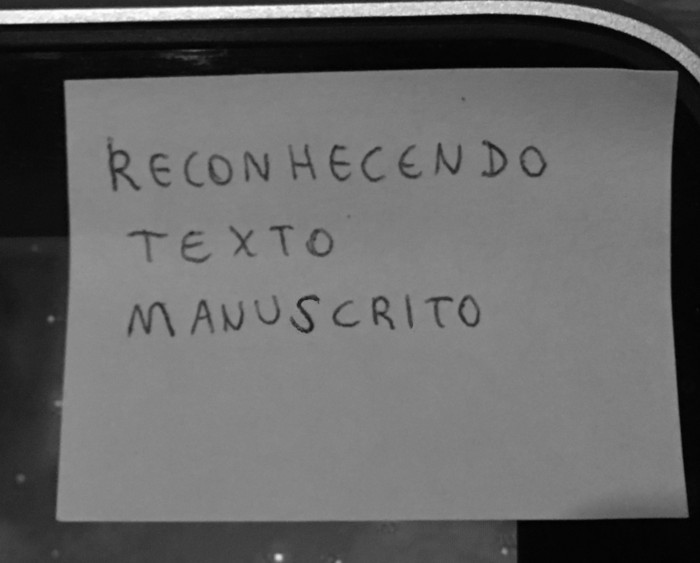

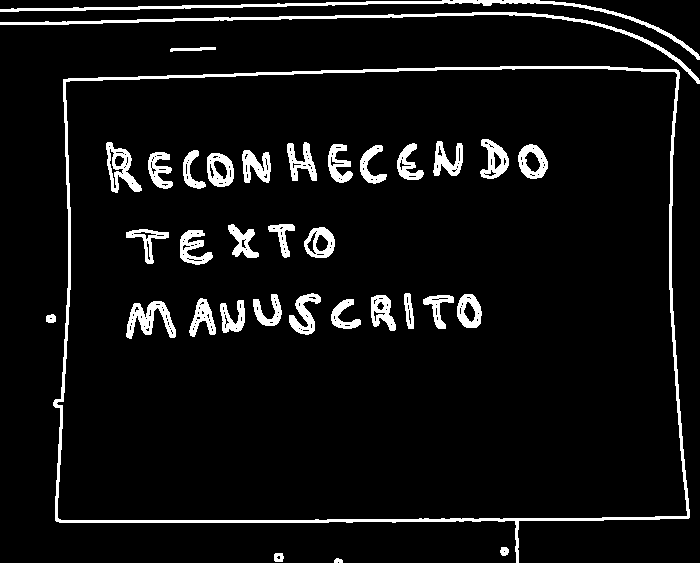

In [ ]:
gray, img_processada = preprocessar_img(img)
cv2_imshow(gray)
cv2_imshow(img_processada)

In [ ]:
# RETR_EXTERNAL

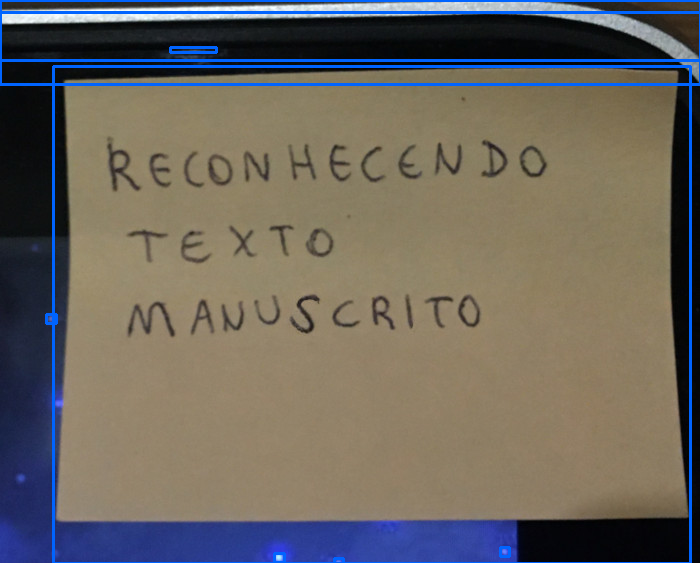

In [ ]:
conts = encontrar_contornos(img_processada.copy())
img_cp = img.copy()
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  #if (w >= l_min and w <= l_max) and (h >= a_min and h <= a_max):
  roi = gray[y:y + h, x:x + w]
  thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  cv2.rectangle(img_cp, (x, y), (x + w, y + h), (255, 100, 0), 2)
cv2_imshow(img_cp)

In [ ]:
img.shape

(563, 700, 3)

In [ ]:
altura, largura = img.shape[:2]
print(altura, largura)

563 700


In [ ]:
contornos_tamanho = sorted(conts, key=cv2.contourArea, reverse=True)

In [ ]:
contornos_tamanho

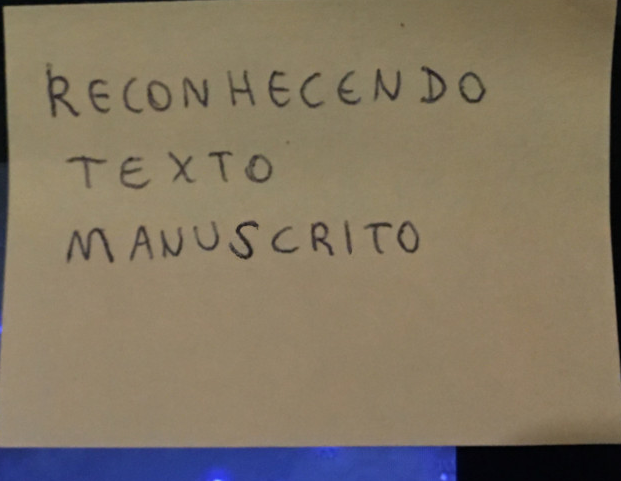

In [ ]:
for c in contornos_tamanho:
  (x, y, w, h) = cv2.boundingRect(c)

  if (w >= (largura / 2)) and (h >= altura / 2):
    corta = 8
    img_cortada = img[y+corta:y + h - corta, x+corta:x + w - corta]
    cv2_imshow(img_cortada)

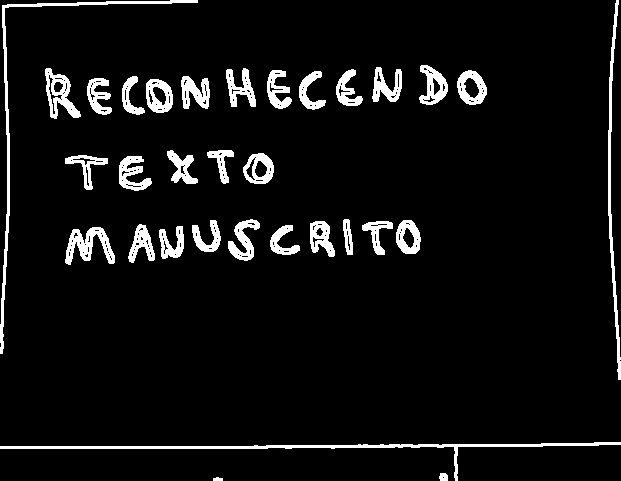

In [ ]:
gray, img_processada = preprocessar_img(img_cortada)
cv2_imshow(img_processada)

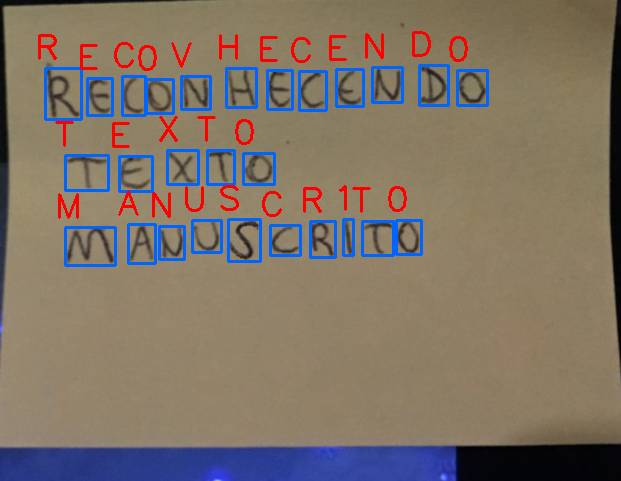

In [ ]:
conts = encontrar_contornos(img_processada.copy())
caracteres = []
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  if (w >= l_min and w <= l_max) and (h >= a_min and h <= a_max):
    processa_caixa(gray, x, y, w, h)

caixas = [b[1] for b in caracteres]
caracteres = np.array([c[0] for c in caracteres], dtype="float32")

previsoes = rede_neural.predict(caracteres)

img_cp = img_cortada.copy()

# percorre todas as predições e caixas delimitadoras
for (previsoes, (x, y, w, h)) in zip(previsoes, caixas): 
  i, probabilidade, caractere = predicao(previsoes, lista_caracteres)
  desenhar_na_img(img_cp, caractere)
cv2_imshow(img_cp)